In [1]:
import sys, os, pickle
import numpy as np
from dsc.dsc_io import load_dsc as __load_dsc__, source_dirs as __source_dirs__

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black')

In [23]:
resdir = "/home/saikat/Documents/work/sparse-regression/mr-ash-penalized/gradvi-experiments/dsc/results/trendfiltering_runtime"
idsc = 2


data = __load_dsc__(f'{resdir}/changepoint/changepoint_{idsc}.pkl')
res_gvma = __load_dsc__(f'{resdir}/gvma/changepoint_{idsc}_gvma_1.pkl')
res_genlasso = __load_dsc__(f'{resdir}/genlasso/changepoint_{idsc}_genlasso_1.rds')
res_gradvi = __load_dsc__(f'{resdir}/gradvi_compound/changepoint_{idsc}_gvma_1_gradvi_compound_1.pkl')
res_cavi = __load_dsc__(f'{resdir}/mr_ash/changepoint_{idsc}_gvma_1_mr_ash_1.rds')

In [24]:
data.keys()

dict_keys(['X', 'Xinv', 'Xscale', 'Xinvscale', 'y', 'ytest', 'ytrue', 'beta', 'snr', 'degree', 'DSC_DEBUG'])

In [25]:
res_gvma.keys()

dict_keys(['y_ma', 'DSC_DEBUG'])

In [26]:
degree = data['degree']
y = data['y']
ytrue = data['ytrue']
yinit = res_gvma['y_ma']
genlasso_ypred = res_genlasso['ypred']
gradvi_ypred = res_gradvi['ypred']
cavi_ypred = res_cavi['ypred']

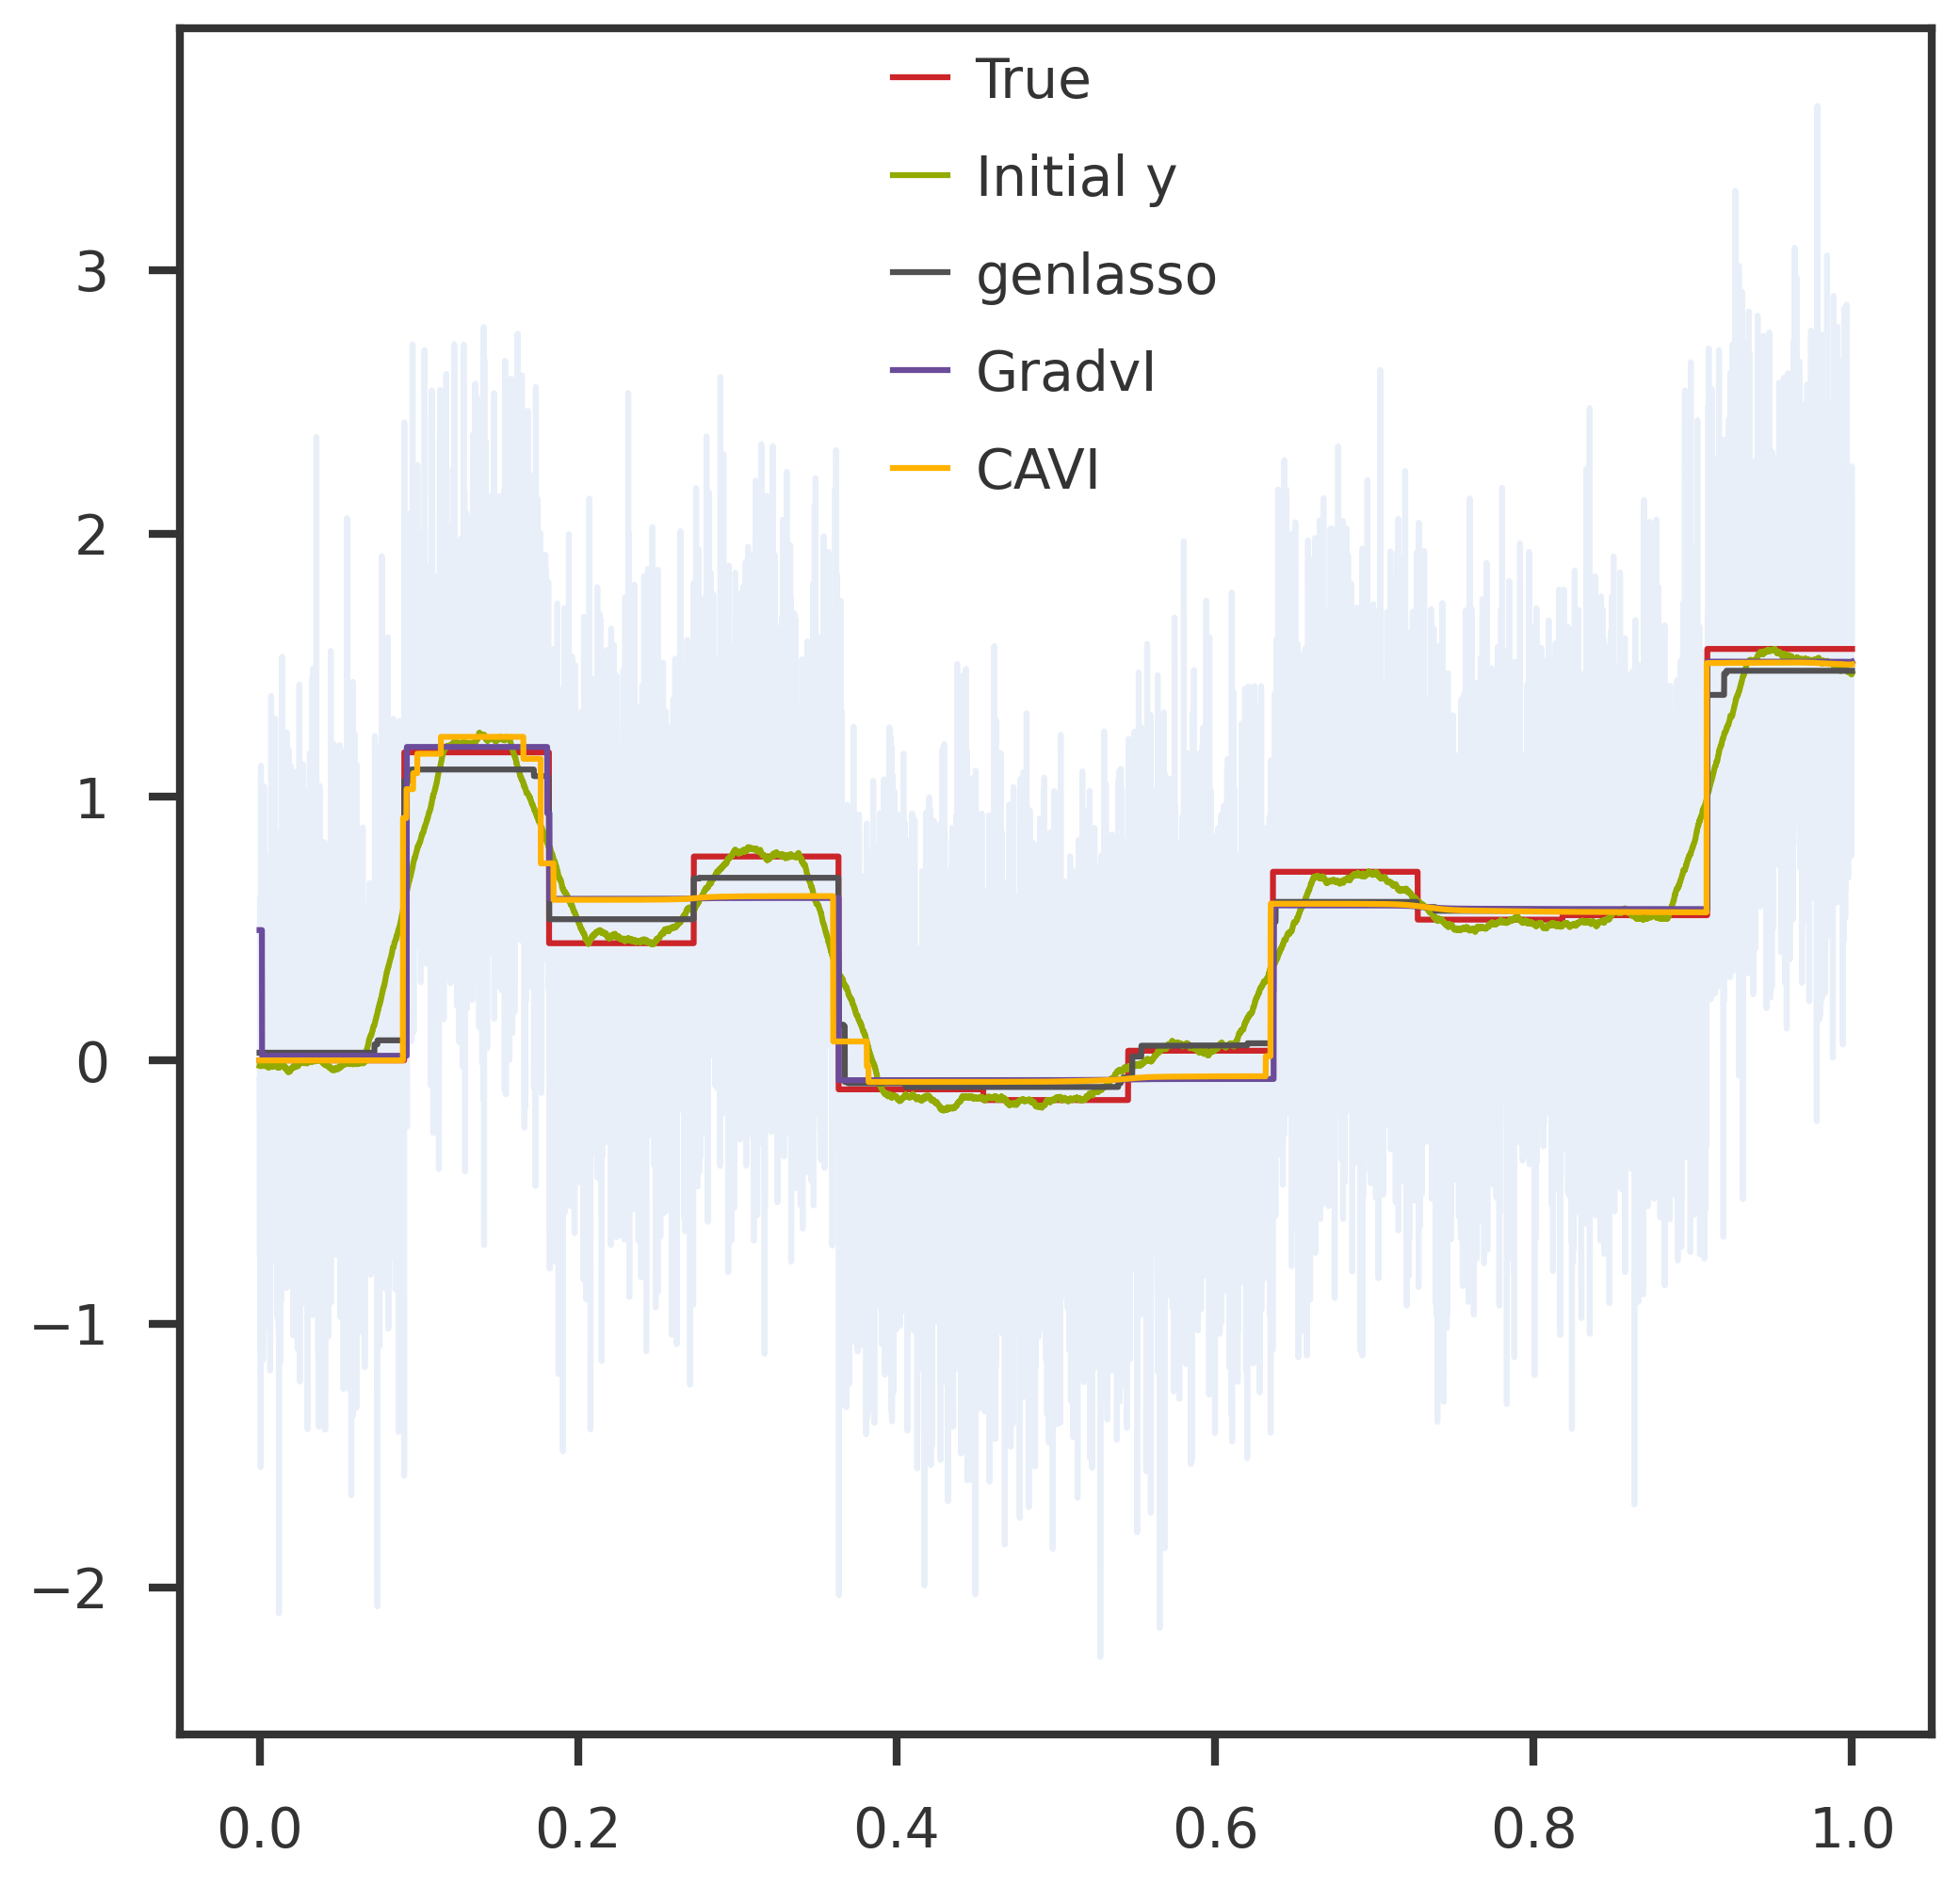

In [40]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

xvals = np.linspace(0, 1, y.shape[0])
#ax1.scatter(xvals, y, s = 1, alpha = 0.1)
ax1.plot(xvals, y, alpha = 0.1)
ax1.plot(xvals, ytrue, label = "True")
ax1.plot(xvals, yinit, label = "Initial y")
ax1.plot(xvals, genlasso_ypred, label = 'genlasso')
ax1.plot(xvals, gradvi_ypred, label = 'GradvI')
ax1.plot(xvals, cavi_ypred, label = 'CAVI')
ax1.legend()
plt.show()

In [29]:
res_gradvi['DSC_DEBUG']['time']

102.49998146202415

In [34]:
res_genlasso['DSC_DEBUG']['time']['elapsed']

65.63900000000001

In [36]:
res_cavi['DSC_DEBUG']['time']['user.self']

130.523

In [37]:
res_gradvi.keys()

dict_keys(['ypred', 'model', 'DSC_DEBUG'])

In [38]:
res_gradvi['model']

{'_dj': array([1.000e+04, 9.999e+03, 9.998e+03, ..., 3.000e+00, 2.000e+00,
        1.000e+00]),
 '_init_params': (array([-0.6520482 ,  0.03228336, -0.02717962, ...,  0.68559242,
          0.81536187,  0.50235534]),
  array([-0.01005033, -7.54959017, -7.54959017, -7.54959017, -7.54959017,
         -7.54959017, -7.54959017, -7.54959017, -7.54959017, -7.54959017,
         -7.54959017, -7.54959017, -7.54959017, -7.54959017, -7.54959017,
         -7.54959017, -7.54959017, -7.54959017, -7.54959017, -7.54959017]),
  0.6033951813752539),
 '_invert_method': None,
 '_invert_options': {},
 '_is_debug': False,
 '_is_elbo_calc': False,
 '_is_intercept': False,
 '_method': 'l-bfgs-b',
 '_nclbk': 1042,
 '_objtype': 'reparametrize',
 '_opts': {'maxiter': 20000,
  'disp': False,
  'ftol': 1e-09,
  'gtol': 1e-09,
  'maxfun': 200000},
 'coef': array([-2.64403031e-08, -1.26625399e-08, -1.00076032e-08, ...,
         4.55429944e-04,  4.55662874e-04,  1.46825757e-04]),
 'elbo_path': array([16036.95379941, 15

In [ ]:
path = "../dsc/functions/"

In [14]:
for name, func in __source_dirs__(['../dsc/functions']):
    globals()[name] = func
from fit_gradvi import fit_ash_trendfiltering_gradvi

In [16]:
s2init = None
ncomp = 20
sparsity = 0.9 
skbase = 20
objtype = "direct"

binit = np.dot(Xinv, yinit)
run_init = True
model, mu, beta = fit_ash_trendfiltering_gradvi(X, y, objtype,
                    degree = degree, ncomp = ncomp, sparsity = sparsity, skbase = skbase,
                    binit = binit, s2init = s2init, run_initialize = run_init)

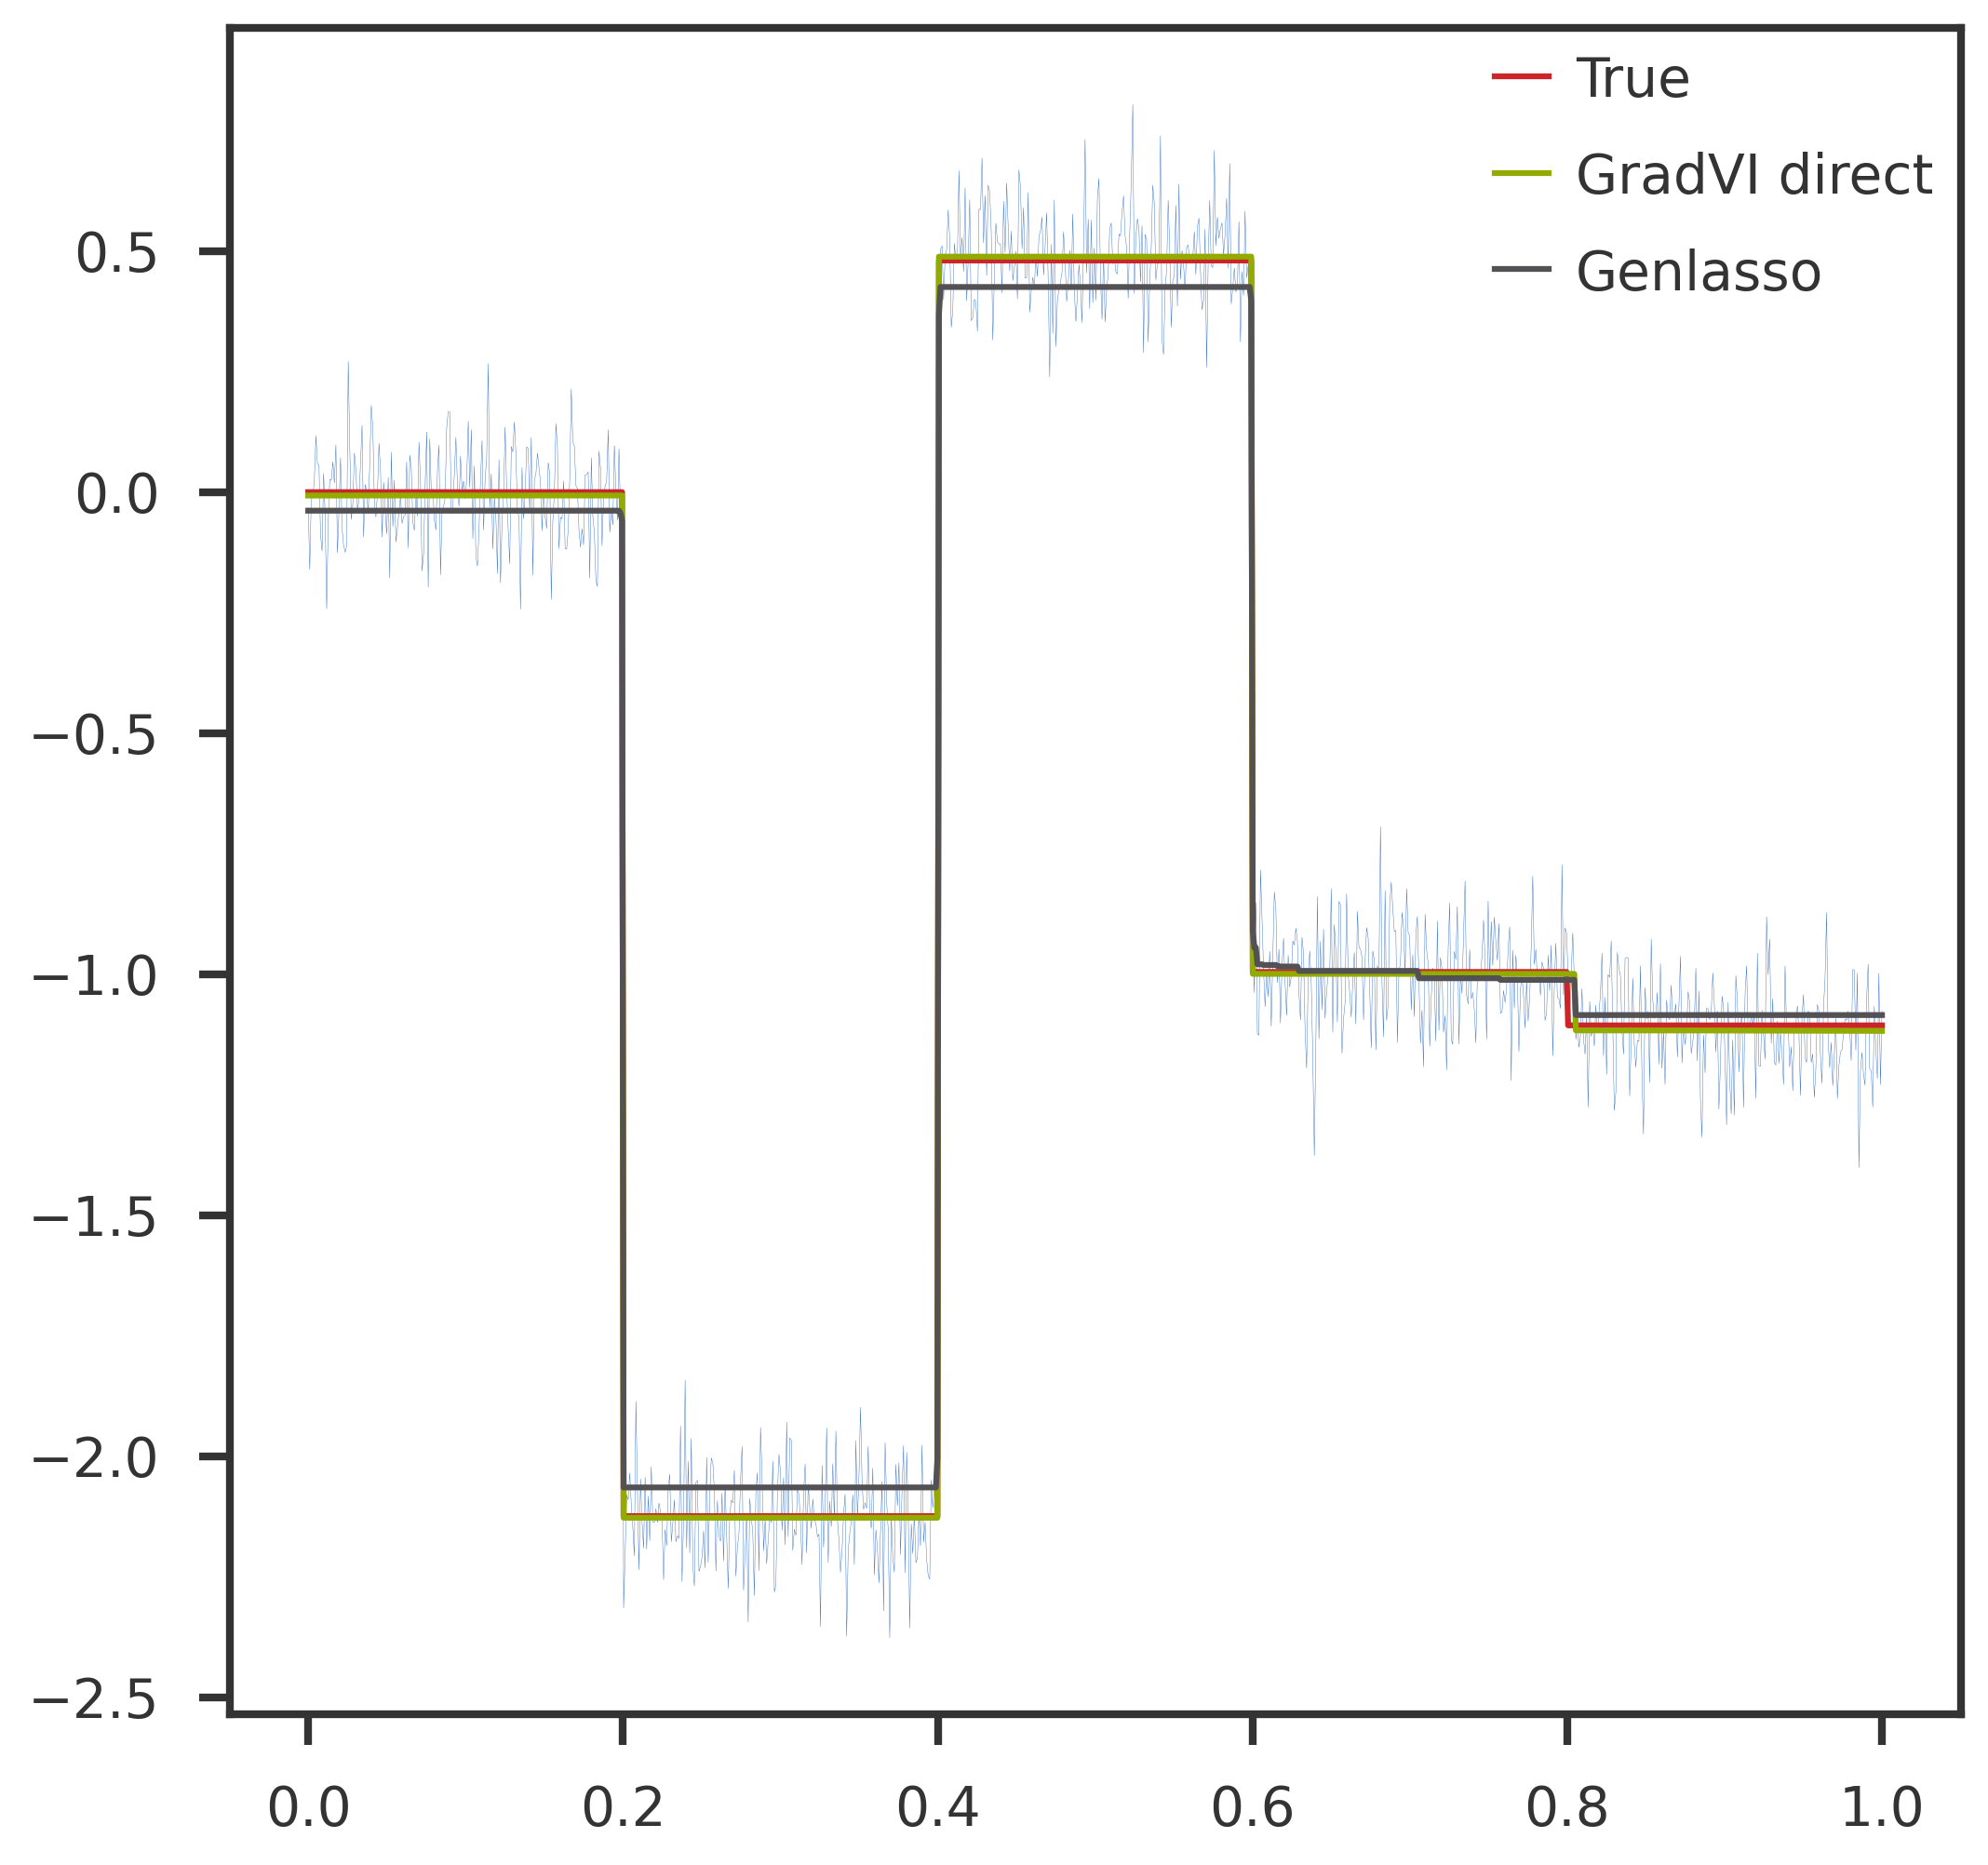

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
xvals = np.linspace(0, 1, y.shape[0])
#ax1.scatter(xvals, y, s = 1)
ax1.plot(xvals, y, lw = 0.1)
ax1.plot(xvals, ytrue, label = "True")
ax1.plot(xvals, np.dot(X, beta) + mu, label = "GradVI direct")
ax1.plot(xvals, yinit, label = "Genlasso")
ax1.legend()
plt.show()

In [19]:
model['prior']

{'smbase': 2.718281828459045,
 'sk': array([ 0.        ,  0.16158635,  0.34928285,  0.56730854,  0.8205642 ,
         1.11474253,  1.45645605,  1.85338582,  2.31445402,  2.85002454,
         3.47213595,  4.19477208,  5.03417634,  6.00921686,  7.14181063,
         8.45741609,  9.98560543, 11.76072931, 13.82268898, 16.21783319]),
 'w': array([9.93958596e-01, 3.25974272e-04, 3.24868397e-04, 3.21638304e-04,
        3.18483188e-04, 3.16134265e-04, 3.14434537e-04, 3.13192646e-04,
        3.12358480e-04, 3.12147208e-04, 3.12793432e-04, 3.14203164e-04,
        3.16062070e-04, 3.17991578e-04, 3.19605550e-04, 3.20627530e-04,
        3.20974887e-04, 3.20730529e-04, 3.20057556e-04, 3.19126045e-04]),
 'wmod': array([ 2.65525975, -5.36737262, -5.37077091, -5.38076344, -5.39062139,
        -5.39802406, -5.40341517, -5.40737259, -5.41003958, -5.41071618,
        -5.40864807, -5.40415128, -5.39825246, -5.39216618, -5.3871035 ,
        -5.38391097, -5.38282819, -5.38358978, -5.38569023, -5.38860493]),
 